# part 1

In some ways, deep neural networks have already become a huge breakthrough. In other ways, they have some shortcomings that might hold them back from becoming the "perfect solution" to things like the Turing Test and general intelligence. Deep neural networks have very impressive results: Image recognition with 99 percent accuracy, and winning complex games like GO or Starcraft. However, these processes require extreme lengths of training, and are made to fulfill a very specific goal. It seems perhaps a bit anticlimactic to assume that neural networks are the final answer to the AI endeavor.

Perceptrons and Expert systems were promising in theory, but failed to deliver on what their creators claimed they could do. Perceptrons couldn't implement a single XOR function. Expert systems broke after more than a thousand decision trees. Deep neural networks, however, are already delivering on many fronts. As a 3d artist, I never thought I'd see real-time raytracing in 3d rendering for another 5 to 10 years. [NVIDIA has already done so](https://www.youtube.com/watch?v=N9F3z8Fl0Nc) by using a deep convolutional network to denoise a single per-pixel raytrace pass (effectively rendering photo-realistic light simulations at a stable framerate).

It also begs the question: will this be the technique used from here on out? Will this be the for() loop that eliminated jumpX calls? I can see a future in which neural networks remain the king of AI solutions. It involves the introduction of faster and fancier hardware that makes google-level data crunching possible to common lay-programmers like me. However, in its current form, deep nerual networks need a lot of training to predict even a few outputs. They rely extremely on correlation and not so much on extrapolation. I think trained neural networks don't have any kind of inquisitive or creative decision making that could be attributed to anything but another complex machine. At the same time, I don't have any better ideas.

# part 2

## feeding forward

multiply input to weights (initialized as small numbers)

$\begin{pmatrix}
1 & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
0.11 & 0.12 \\
0.21 & 0.08 
\end{pmatrix}
\cdot
\begin{pmatrix}
0.14 \\
0.15 
\end{pmatrix}$

multiplying first and second matrix

1*0.11+1*0.21 =

1*0.12+1*0.08 =

In [2]:
print(1*0.11+1*0.21)
print(1*0.12+1*0.08)

0.32
0.2


now we have

$\begin{pmatrix}
0.32 & 0.2
\end{pmatrix}
\cdot
\begin{pmatrix}
0.14 \\
0.15 
\end{pmatrix}$

calculates to 0.32 * .14 + 0.2 *0.15

In [3]:
print(0.32 * .14 + 0.2 *0.15)

0.0748


## error computation

using L2 error

>target value: 0

>what we got: 0.0748

>(0 - 0.0748)^2 = 0.0056

delta = -0.0748

## back propogation

with the in class example as my inspiration, the learning rate shall be .05

Now we back propogate through the most recent matrix operation

$\begin{pmatrix}
0.14 & 0.15
\end{pmatrix}+ .05
\begin{pmatrix}
0.32 \\
0.20
\end{pmatrix}$ * -.0748

=

$\begin{pmatrix}
0.14 & 0.15
\end{pmatrix}+
\begin{pmatrix}
-.001197 \\
-.00075
\end{pmatrix}$

which is

In [4]:
print(.14 - .001197)
print(.15 - .00075)

0.138803
0.14925



# part 3

training images         
	count: 60000         
	shape: (60000, 28, 28)         
	image data type: uint8         
	label data type: uint8
 testing images         
	count: 10000         
	shape: (10000, 28, 28)



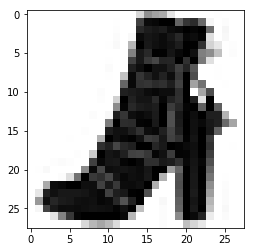

In [15]:
from keras import models
from keras import layers
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

##outputting the set data
print(
    f'training images \
        \n\tcount: {len(train_labels)} \
        \n\tshape: {train_images.shape} \
        \n\timage data type: {train_images.dtype} \
        \n\tlabel data type: {train_labels.dtype}\n',
    f'testing images \
        \n\tcount: {len(test_labels)} \
        \n\tshape: {test_images.shape}\n',
)

import matplotlib.pyplot as plt

#chose this nice stiletto as a shining example
digit_image = train_images[11]
#display the image
plt.imshow(digit_image, cmap=plt.cm.binary)

In [58]:
from keras.utils import to_categorical

#for some reason this wouldn't compile until I re-loaded the data. not sure why
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 784)) #combines 28 by 28 graph into a single 1d vector
test_images = test_images.reshape((10000, 784))

#cast image sectors to a float value
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') /255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

layercake = models.Sequential()
layercake.add(layers.Dense(1024, activation='relu', input_shape=(784,)))

#got advice from a friend to use adam, dropout, and binary crossentropy. I was not dissapointed
layercake.add(layers.Dropout(0.02))

#layercake.add(layers.Flatten())
layercake.add(layers.Dense(64, activation='relu'))
layercake.add(layers.Dense(10, activation='softmax'))


layercake.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


layercake.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_30 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 64)                65600     
_________________________________________________________________
dense_67 (Dense)             (None, 10)                650       
Total params: 870,090
Trainable params: 870,090
Non-trainable params: 0
_________________________________________________________________


In [59]:
layercake.fit(train_images, train_labels, epochs=5, batch_size=128)

layercake.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.0859 - acc: 0.9658
Epoch 2/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.0636 - acc: 0.9746
Epoch 3/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.0578 - acc: 0.9767
Epoch 4/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.0544 - acc: 0.9781
Epoch 5/5
10000/10000 [==============================] - 1s 84us/step


[0.06477573670744896, 0.9738900044441223]